In [3]:
from keras.datasets import imdb
from keras import preprocessing

Using TensorFlow backend.


In [96]:
max_features = 10000 # size of word dictionary; words are the features of the model
maxlen = 400 # maximum number of words in a single review

In [97]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [98]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [99]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding

In [100]:
embed_vector_size = 8 # the word dictionary is mapped to a vector of floats of this size

model = Sequential()
model.add(Embedding(max_features, embed_vector_size, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 400, 8)            80000     
_________________________________________________________________
flatten_11 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3201      
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [103]:
history_len400 = model.fit(x_train, y_train,
          epochs=20,
          batch_size=32, 
          validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 97us/step - loss: 0.5811 - acc: 0.6964 - val_loss: 0.3810 - val_acc: 0.8550
Epoch 2/20
20000/20000 [==============================] - 2s 79us/step - loss: 0.2975 - acc: 0.8851 - val_loss: 0.2764 - val_acc: 0.8858
Epoch 3/20
20000/20000 [==============================] - 2s 80us/step - loss: 0.2270 - acc: 0.9134 - val_loss: 0.2569 - val_acc: 0.8972
Epoch 4/20
20000/20000 [==============================] - 2s 82us/step - loss: 0.1923 - acc: 0.9268 - val_loss: 0.2515 - val_acc: 0.9004
Epoch 5/20
20000/20000 [==============================] - 2s 84us/step - loss: 0.1688 - acc: 0.9367 - val_loss: 0.2572 - val_acc: 0.8998
Epoch 6/20
20000/20000 [==============================] - 1s 74us/step - loss: 0.1501 - acc: 0.9444 - val_loss: 0.2635 - val_acc: 0.8974
Epoch 7/20
20000/20000 [==============================] - 1s 71us/step - loss: 0.1328 - acc: 0.9522 - val_loss: 0.2692 - val_acc:

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

In [110]:
epochs=range(1, len(history_len25.history['acc']) + 1)

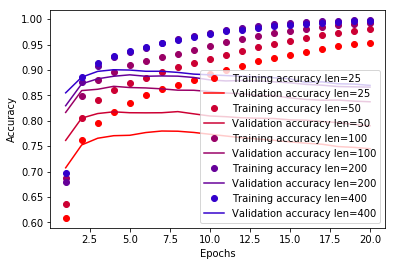

In [135]:
plt.plot(epochs, history_len25.history['acc'], c=(1.0,0,0), marker='o', ls='None', label='Training accuracy len=25')
plt.plot(epochs, history_len25.history['val_acc'], c=(1.0,0,0), label='Validation accuracy len=25')
plt.plot(epochs, history_len50.history['acc'], c=(0.8,0,0.2), marker='o', ls='None', label='Training accuracy len=50')
plt.plot(epochs, history_len50.history['val_acc'], c=(0.8,0,0.2), label='Validation accuracy len=50')
plt.plot(epochs, history_len100.history['acc'], c=(0.6,0,0.4), marker='o', ls='None', label='Training accuracy len=100')
plt.plot(epochs, history_len100.history['val_acc'], c=(0.6,0,0.4), label='Validation accuracy len=100')
plt.plot(epochs, history_len200.history['acc'], c=(0.4,0,0.6), marker='o', ls='None', label='Training accuracy len=200')
plt.plot(epochs, history_len200.history['val_acc'], c=(0.4,0,0.6), label='Validation accuracy len=200')
plt.plot(epochs, history_len400.history['acc'], c=(0.2,0,0.8), marker='o', ls='None', label='Training accuracy len=400')
plt.plot(epochs, history_len400.history['val_acc'], c=(0.2,0,0.8), label='Validation accuracy len=400')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()